In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# from sklearn.externals import joblib
from sklearn import  tree

In [10]:
data = pd.read_csv('music.csv')
data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [11]:
data.shape

(18, 3)

In [12]:
data.isnull().any()

age       False
gender    False
genre     False
dtype: bool

In [13]:
data.genre.unique()

array(['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic'], dtype=object)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [15]:
data.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


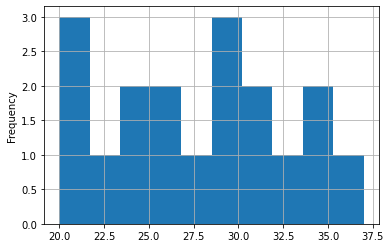

In [16]:
data.age.plot(kind='hist')
plt.grid()

<AxesSubplot:>

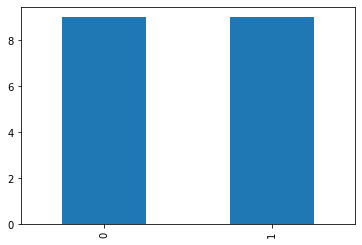

In [17]:
data.gender.value_counts().plot(kind='bar')

In [18]:
data.gender.value_counts()

0    9
1    9
Name: gender, dtype: int64

In [19]:
data.genre.value_counts()

Classical    6
Jazz         3
Dance        3
HipHop       3
Acoustic     3
Name: genre, dtype: int64

<AxesSubplot:>

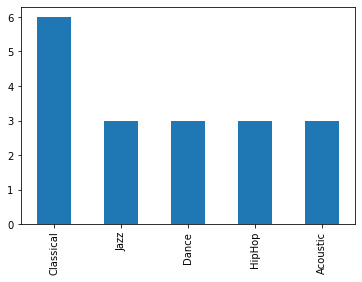

In [20]:
data.genre.value_counts().plot(kind='bar')

<AxesSubplot:>

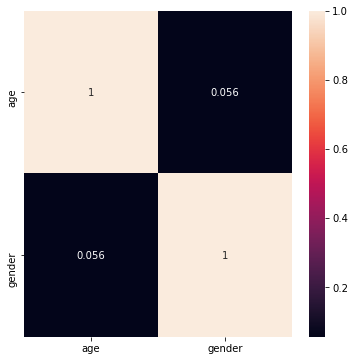

In [21]:
cor = data.corr()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cor, annot=True, ax=ax)

In [22]:
le = LabelEncoder()
data['genre'] = le.fit_transform(data.genre)
data.head()

,age,gender,genre
0,20,1,3
1,23,1,3
2,25,1,3
3,26,1,4
4,29,1,4


In [23]:
data.genre.unique()

array([3, 4, 1, 2, 0])

In [24]:
x = data.drop(columns = 'genre')
y = data.genre

In [25]:
model = DecisionTreeClassifier()

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.3)

In [27]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
# joblib.dump(model, 'music-recommender.joblib')
# joblib.load('music-recommender.joblib')

In [29]:
predict = model.predict(x_test)

In [30]:
score = print('Accuracy: ',str(metrics.accuracy_score(y_test, predict)*100)+'%')
score

Accuracy:  16.666666666666664%


In [31]:
ypred = {3:'HipHop', 4:'Jazz', 1:'Classical', 2:'Dance', 0:'Acoustic'}

In [32]:
predicted = model.predict([[30,0]])
ypred[int(predicted)]

'Acoustic'

In [33]:
tree.export_graphviz(model,  out_file='music-recommender.dot', feature_names=['age','gender'], 
                     class_names=sorted(Y.unique()), label='all', rounded=True, filled=True)

NameError: name 'Y' is not defined

In [44]:
Y = data.genre
tree.export_graphviz(model, out_file='music-recommender.dot', feature_names=['age','gender'], 
                     class_names=sorted(Y.unique()), label='all', rounded=True, filled=True)

TypeError: can only concatenate str (not "numpy.int32") to str